In [1]:
import fish_models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fish_models.AbstractModel

fish_models.gym_interface.AbstractModel

In [7]:
class RandomModel(fish_models.AbstractModel):
    def choose_action(self):
        # Return speed and turn from view
        speed = np.random.random() * 5.
        turn = (np.random.random() - 0.5) * 5.
        return speed, turn

In [8]:
class WallAvoidingModel(fish_models.AbstractModel):
    def choose_action(self, poses_3d, self_id):
        my_pose = poses_3d[self_id]
        speed = 4
        if my_pose[0] < -45 or my_pose[0] > 45 or my_pose[1] < -45 or my_pose[1] > 45:
            turn = 1
        else:
            turn = 0
        return speed, turn


In [9]:
# Lets use the random model from above
randommodel = RandomModel()
wallavoidingmodel = WallAvoidingModel()

# Either one model or an array of models can be passed to the generator.
generator = fish_models.TrackGeneratorGym(
    [randommodel, wallavoidingmodel], world_size=[100,100], frequency=25
)

track = generator.create_track(n_guppies=2, trackset_len=3000)
print(track.shape)


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 2999/2999 [00:01<00:00, 2067.39it/s]

(2, 3000, 3)


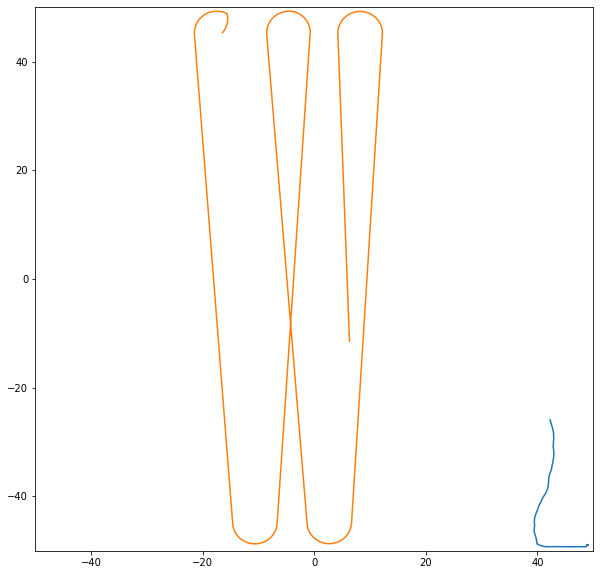

In [10]:
plt.figure(figsize=(10,10))
plt.xlim(-50,50)
plt.ylim(-50,50)
for fish_id in range(2):
    plt.plot(track[fish_id, :, 0], track[fish_id, :, 1])
plt.show()

In [10]:
class RaycastModel(fish_models.AbstractModel):
    def __init__(self, raycast):
        self.raycast = raycast

    def choose_action(self, view):
        speed = 3
        if view[6] > 0.99:
            turn = 1.5708
        else:
            turn = 0
        return speed, turn

In [3]:
raycast = fish_models.Raycast(
            n_fish_bins=4,
            n_wall_raycasts=5,
            fov_angle_fish_bins=np.pi,
            fov_angle_wall_raycasts=np.pi,
            world_bounds=([-50, -50], [50, 50]),
            
        )

100%|████████████████████████████████████| 2999/2999 [00:02<00:00, 1369.34it/s]


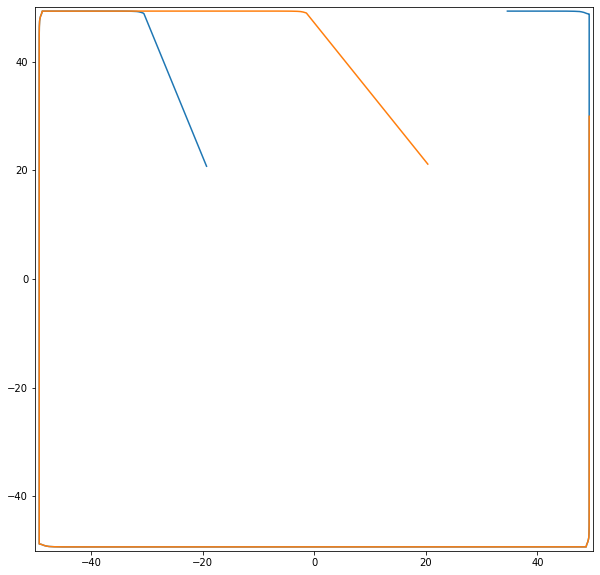

In [11]:
# Lets use the random model from above
raymodel1 = RaycastModel(raycast)
raymodel2 = RaycastModel(raycast)

# Either one model or an array of models can be passed to the generator.
generator = fish_models.TrackGeneratorGym(
    [raymodel1, raymodel2], world_size=[100,100], frequency=25
)
n = 2
track = generator.create_track(n_guppies=n, trackset_len=3000)
#print(track.shape)
plt.figure(figsize=(10,10))
plt.xlim(-50,50)
plt.ylim(-50,50)
for fish_id in range(n):
    plt.plot(track[fish_id, :, 0], track[fish_id, :, 1])
plt.show()

In [12]:
track.shape

(2, 3000, 3)

In [4]:
data_folder = fish_models.live_female_female_data() / "train"

dset = fish_models.IoDataset(
    data_folder,
    raycast,
    output_strings=["poses", "actions", "views"],
    #reduce_dim=2,
    max_files=10,
)

Loading data from 10 files.


100%|██████████████████████████████████████████| 10/10 [00:20<00:00,  2.02s/it]


Calculating views from 10 files.


100%|██████████████████████████████████████████| 10/10 [00:14<00:00,  1.44s/it]


Reducing shape of poses.


100%|████████████████████████████████████████| 10/10 [00:00<00:00, 4999.17it/s]


Reducing shape of actions.


100%|████████████████████████████████████████| 10/10 [00:00<00:00, 9991.20it/s]


Reducing shape of views.


100%|████████████████████████████████████████| 10/10 [00:00<00:00, 3333.84it/s]

Status of IoDataset:
poses	(10, 2, 8989, 3):	consisting of x, y, orientation.
actions	(10, 2, 8989, 2):	consisting of speed [cm/s] and turn [rad/s].
views	(10, 2, 8989, 9):	consisting of 4 fish bins and 5 wall raycasts.



In [5]:
dset["actions"].shape

(10, 2, 8989, 2)

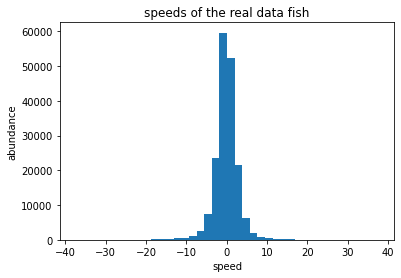

In [15]:
plt.hist(dset["actions"][:,1], bins=40)
plt.title("speeds of the real data fish")
plt.ylabel("abundance")
plt.xlabel("speed")
plt.show()

# Couzin Data

In [6]:
raycast = fish_models.Raycast(
            n_fish_bins=20,
            n_wall_raycasts=25,
            fov_angle_fish_bins=np.pi,
            fov_angle_wall_raycasts=np.pi,
            world_bounds=([-50, -50], [50, 50]),
            view_of = ["fish", "fish_oris", "walls"]
        )

In [7]:
data_folder = r"C:\Users\Olaf\OneDrive\Öffentlich\Master\ResearchInternship\couzin_torus\couzin_torus\train"

dset = fish_models.IoDataset(
    data_folder,
    raycast,
    output_strings=["poses", "actions", "views"],
    #reduce_dim=1,
    #max_files=10,
)

Loading data from 197 files.


100%|████████████████████████████████████████| 197/197 [00:45<00:00,  4.29it/s]


Calculating views from 197 files.


100%|████████████████████████████████████████| 197/197 [01:18<00:00,  2.51it/s]


Reducing shape of poses.


100%|█████████████████████████████████████| 197/197 [00:00<00:00, 21439.49it/s]


Reducing shape of actions.


100%|█████████████████████████████████████| 197/197 [00:00<00:00, 32729.06it/s]


Reducing shape of views.


100%|██████████████████████████████████████| 197/197 [00:00<00:00, 3231.19it/s]


Status of IoDataset:
poses	(197, 8, 749, 3):	consisting of x, y, orientation.
actions	(197, 8, 749, 2):	consisting of speed [cm/s] and turn [rad/s].
views	(197, 8, 749, 65):	consisting of 20 fish bins, 20 fish oris and 25 wall raycasts.

Note: There will exist NaNs in the output of this dataset. You might want to use the reduce_dim parameter to get rid of them


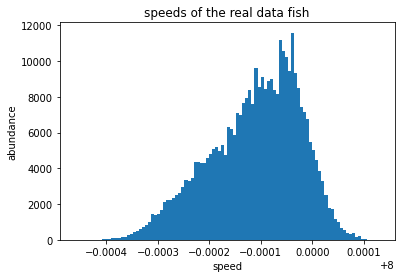

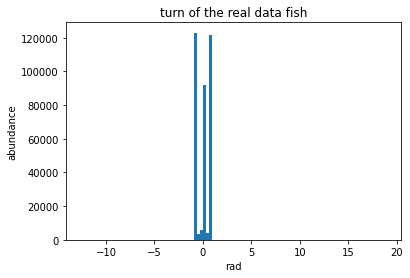

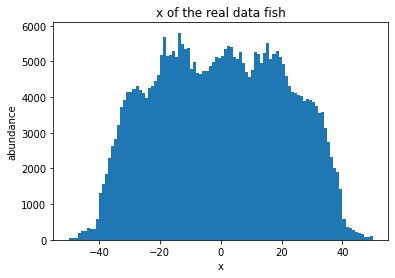

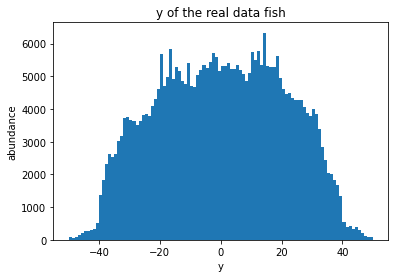

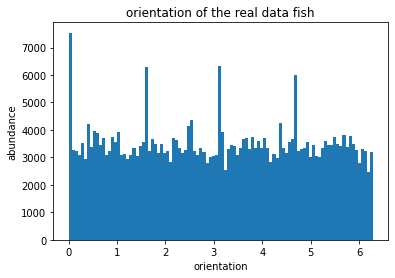

In [58]:
plt.hist(dset["actions"][:,0].flatten(), bins=100)
plt.title("speeds of the real data fish")
plt.ylabel("abundance")
plt.xlabel("speed")
plt.show()
plt.hist(dset["actions"][:,1].flatten(), bins=100)
plt.title("turn of the real data fish")
plt.ylabel("abundance")
plt.xlabel("rad")
plt.show()
plt.hist(dset["poses"][:,0].flatten(), bins=100)
plt.title("x of the real data fish")
plt.ylabel("abundance")
plt.xlabel("x")
plt.show()
plt.hist(dset["poses"][:,1].flatten(), bins=100)
plt.title("y of the real data fish")
plt.ylabel("abundance")
plt.xlabel("y")
plt.show()
plt.hist(dset["poses"][:,2].flatten(), bins=100)
plt.title("orientation of the real data fish")
plt.ylabel("abundance")
plt.xlabel("orientation")
plt.show()

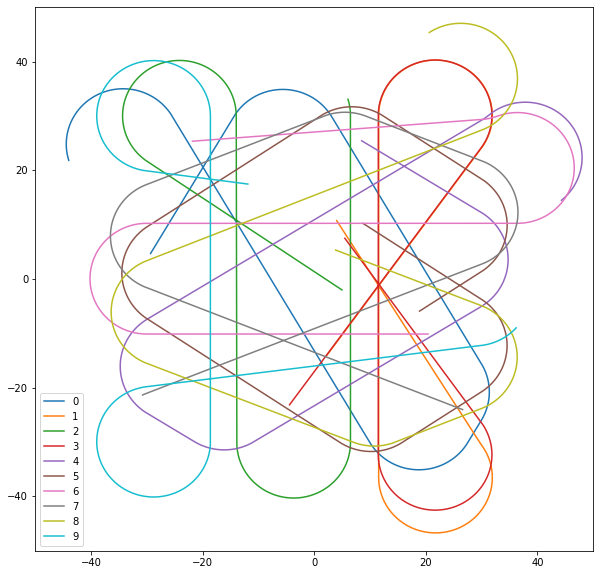

In [23]:
plt.figure(figsize=(10,10))
plt.xlim(-50,50)
plt.ylim(-50,50)
for fish_id in range(10):
    plt.plot(dset["poses"][fish_id, :, 0], dset["poses"][fish_id, :, 1], label=fish_id)
plt.legend()
plt.show()

# Build training dataset

In [60]:
mask2fish = (~np.isnan(dset["poses"]).any(axis=-1).any(axis=-1)).sum(axis=-1) == 2

In [62]:
dset["poses"][mask2fish].shape

(49, 8, 749, 3)

In [92]:
fish2df = dset["poses"][mask2fish][:,(~np.isnan(dset["poses"][mask2fish]).any(axis=-1).any(axis=-1).any(axis=0))]
fish2df.shape

(49, 2, 749, 3)

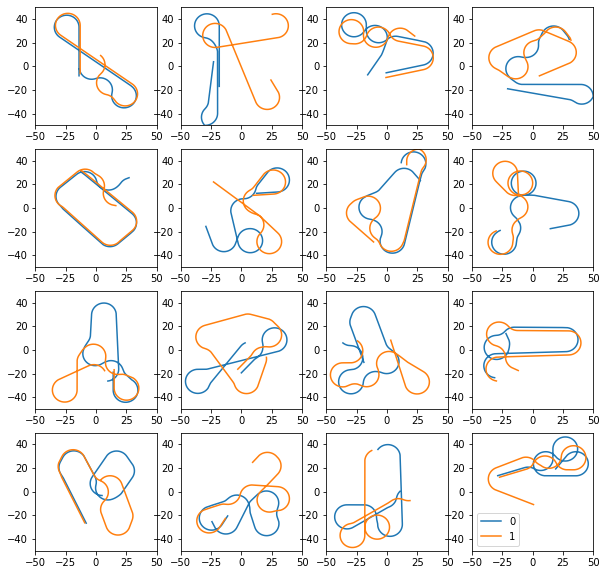

In [95]:
fig, axs = plt.subplots(4,4, figsize=(10,10))
counter = 0
for i in range(4):
    for j in range(4):
        for fish_id in range(2):
            axs[i,j].plot(fish2df[counter,fish_id, :, 0], fish2df[counter,fish_id, :, 1], label=fish_id)
        axs[i,j].set_xlim(-50,50)
        axs[i,j].set_ylim(-50,50)
        counter +=1
plt.legend()
plt.show()

In [59]:
X_train = np.concatenate((dset["poses"], dset["views"]), axis=1)
y_train = dset["actions"][:,1]
X_train.shape, y_train.shape

((349783, 12), (349783,))

In [107]:
X_train2 = dset["views"]
y_train2 = dset["actions"][:,1]
X_train2.shape, y_train2.shape

((349783, 9), (349783,))

# Train Turn Regressor

In [91]:
# from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

In [104]:
regr = RandomForestRegressor(random_state=0, n_estimators=100)
regr.fit(X_train, y_train)
# R^2 value between 0 (always predict expected value) and 1 (always true prediction)
regr.score(X_train, y_train)

0.9862449092856261

In [105]:
class CouzinModel(fish_models.AbstractModel):
    def __init__(self, raycast, regressor):
        self.raycast = raycast
        self.regressor = regressor

    def choose_action(self, poses_3d, view, self_id):
        speed = 8
        #print(poses_3d[self_id].reshape(1, -1), view.reshape(1, -1))
        x_input = np.concatenate((poses_3d[self_id].reshape(1, -1), view.reshape(1, -1)), axis=1)
        turn = float(self.regressor.predict(x_input))
        return speed, turn

100%|████████████████████████████████████████| 999/999 [00:42<00:00, 23.52it/s]


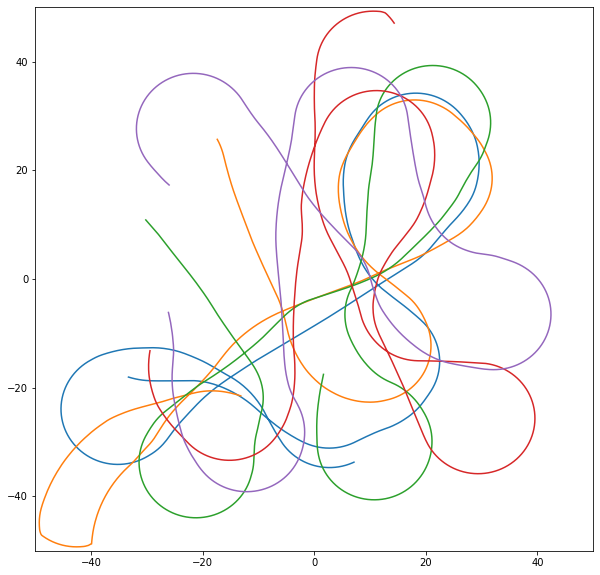

In [106]:
raymodel1 = CouzinModel(raycast, regr)

generator = fish_models.TrackGeneratorGym(
    [raymodel1], world_size=[100,100], frequency=25
)
n = 5
track = generator.create_track(n_guppies=n, trackset_len=1000)
#print(track.shape)
plt.figure(figsize=(10,10))
plt.xlim(-50,50)
plt.ylim(-50,50)
for fish_id in range(n):
    plt.plot(track[fish_id, :, 0], track[fish_id, :, 1])
plt.show()

# Model with only view

In [108]:
regr = RandomForestRegressor(random_state=0, n_estimators=100)
regr.fit(X_train2, y_train2)
# R^2 value between 0 (always predict expected value) and 1 (always true prediction)
regr.score(X_train2, y_train2)

0.9767891537013171

In [110]:
class CouzinModel2(fish_models.AbstractModel):
    def __init__(self, raycast, regressor):
        self.raycast = raycast
        self.regressor = regressor

    def choose_action(self, view):
        speed = 8
        x_input = view.reshape(1, -1)
        turn = float(self.regressor.predict(x_input))
        return speed, turn

100%|████████████████████████████████████████| 999/999 [00:43<00:00, 23.10it/s]


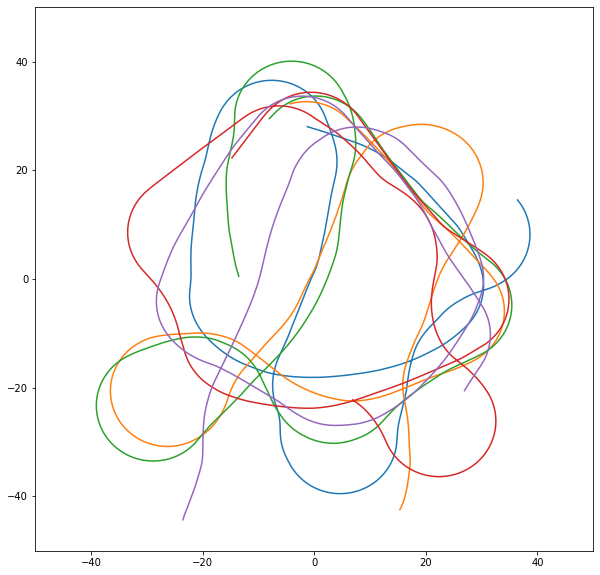

In [111]:
raymodel2 = CouzinModel2(raycast, regr)

generator = fish_models.TrackGeneratorGym(
    [raymodel2], world_size=[100,100], frequency=25
)
n = 5
track = generator.create_track(n_guppies=n, trackset_len=1000)
#print(track.shape)
plt.figure(figsize=(10,10))
plt.xlim(-50,50)
plt.ylim(-50,50)
for fish_id in range(n):
    plt.plot(track[fish_id, :, 0], track[fish_id, :, 1])
plt.show()